In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
dataset=pd.read_csv('Facebook_Marketplace_data.csv')

In [5]:
for i in dataset.columns:
  print(f"{i} has {dataset[i].isnull().sum()} null values")

status_id has 0 null values
status_type has 0 null values
status_published has 0 null values
num_reactions has 0 null values
num_comments has 0 null values
num_shares has 0 null values
num_likes has 0 null values
num_loves has 0 null values
num_wows has 0 null values
num_hahas has 0 null values
num_sads has 0 null values
num_angrys has 0 null values


In [6]:
x = dataset.iloc[:,[1,3,4,5,6,7,8,9,10,11]]


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['status_type']=le.fit_transform(x['status_type'])
print(x)

      status_type  num_reactions  num_comments  num_shares  num_likes  \
0               3            529           512         262        432   
1               1            150             0           0        150   
2               3            227           236          57        204   
3               1            111             0           0        111   
4               1            213             0           0        204   
...           ...            ...           ...         ...        ...   
7045            1             89             0           0         89   
7046            1             16             0           0         14   
7047            1              2             0           0          1   
7048            1            351            12          22        349   
7049            1             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
0            92         3          1         1           0  
1

<ipython-input-10-f01451e101cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['status_type']=le.fit_transform(x['status_type'])


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)


[[ 1.37428794  0.64610394  0.32335035 ...  0.07671305  0.47357035
  -0.15574803]
 [-0.74810636 -0.17319166 -0.25220622 ... -0.17600986 -0.152587
  -0.15574803]
 [ 1.37428794 -0.00673846  0.01308938 ...  0.07671305 -0.152587
  -0.15574803]
 ...
 [-0.74810636 -0.49312768 -0.25220622 ... -0.17600986 -0.152587
  -0.15574803]
 [-0.74810636  0.26131603 -0.23871662 ... -0.17600986 -0.152587
  -0.15574803]
 [-0.74810636 -0.46070173 -0.25220622 ... -0.17600986 -0.152587
  -0.15574803]]


4.	Use the elbow method to find the optimum number of clusters.

In [13]:
wcss=[]

In [14]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

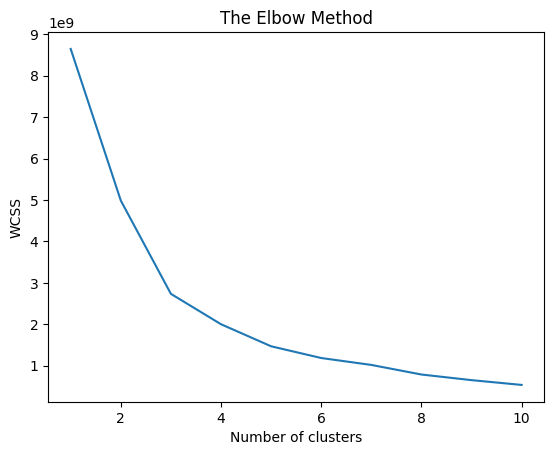

In [15]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [17]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

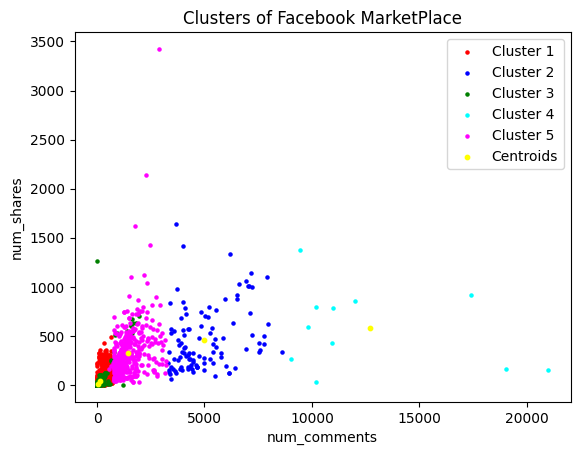

In [35]:
plt.scatter(x[y_kmeans==0].iloc[:,2],x[y_kmeans==0].iloc[:,3],s=5,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1].iloc[:,2],x[y_kmeans==1].iloc[:,3],s=5,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2].iloc[:,2],x[y_kmeans==2].iloc[:,3],s=5,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3].iloc[:,2],x[y_kmeans==3].iloc[:,3],s=5,c='cyan',label='Cluster 4')
plt.scatter(x[y_kmeans==4].iloc[:,2],x[y_kmeans==4].iloc[:,3],s=5,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=10,c='yellow',label='Centroids')
plt.title('Clusters of Facebook MarketPlace')
plt.xlabel('num_comments')
plt.ylabel('num_shares')
plt.legend()


plt.show()
plt.show()

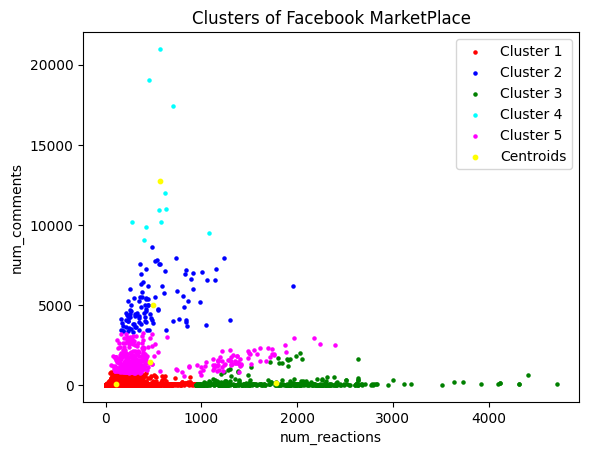

In [33]:
plt.scatter(x[y_kmeans==0].iloc[:,1],x[y_kmeans==0].iloc[:,2],s=5,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1].iloc[:,1],x[y_kmeans==1].iloc[:,2],s=5,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2].iloc[:,1],x[y_kmeans==2].iloc[:,2],s=5,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3].iloc[:,1],x[y_kmeans==3].iloc[:,2],s=5,c='cyan',label='Cluster 4')
plt.scatter(x[y_kmeans==4].iloc[:,1],x[y_kmeans==4].iloc[:,2],s=5,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=10,c='yellow',label='Centroids')
plt.title('Clusters of Facebook MarketPlace')
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.legend()
plt.show()

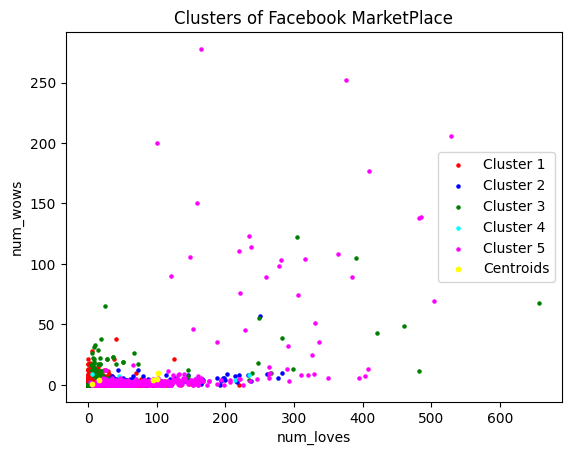

In [57]:
plt.scatter(x[y_kmeans==0].iloc[:,5],x[y_kmeans==0].iloc[:,6],s=5,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1].iloc[:,5],x[y_kmeans==1].iloc[:,6],s=5,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2].iloc[:,5],x[y_kmeans==2].iloc[:,6],s=5,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3].iloc[:,5],x[y_kmeans==3].iloc[:,6],s=5,c='cyan',label='Cluster 4')
plt.scatter(x[y_kmeans==4].iloc[:,5],x[y_kmeans==4].iloc[:,6],s=5,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,5],kmeans.cluster_centers_[:,6],s=10,c='yellow',label='Centroids')
plt.title('Clusters of Facebook MarketPlace')
plt.xlabel('num_loves')
plt.ylabel('num_wows')
plt.legend()
plt.show()

1.How does the time of upload (status_published) affects the num_reaction?

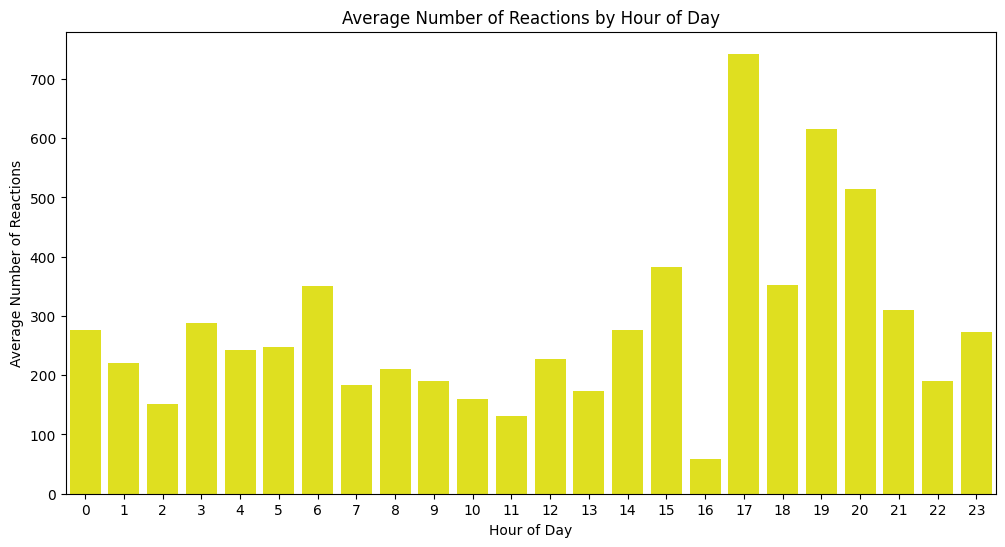

In [65]:
import seaborn as sns
dataset['status_published'] = pd.to_datetime(dataset['status_published'])
dataset['hour'] = dataset['status_published'].dt.hour
a = dataset[['hour', 'num_reactions']]
b = dataset.groupby('hour')['num_reactions'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(b, color='yellow')
plt.title('Average Number of Reactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Reactions')
plt.show()




2	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.164773    0.287155
num_comments        0.164773      1.000000    0.649445
num_shares          0.287155      0.649445    1.000000


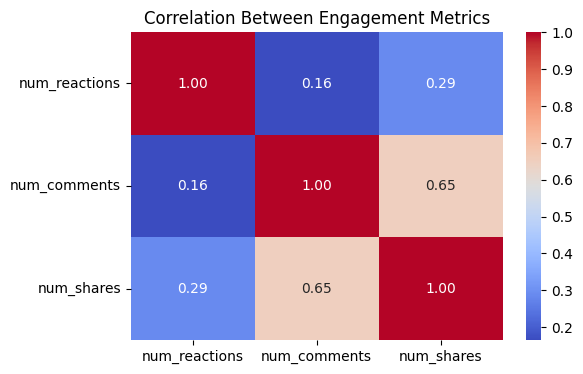

In [69]:

corr_matrix = dataset[['num_reactions', 'num_comments', 'num_shares']].corr()
print(corr_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Engagement Metrics")
plt.show()


5.	What is the count of different types of posts in the dataset?

In [76]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,6
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,22
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,6
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,3


In [99]:

dataset.rename(columns={'status_type': 'post_type'}, inplace=True)
post_counts = dataset['post_type'].value_counts()
print("Count of different types of posts:\n", post_counts)


Count of different types of posts:
 post_type
photo     2631
video     1342
status     227
link        36
Name: count, dtype: int64


6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

In [102]:
avg_values = df.groupby('post_type')[['num_reactions' , 'num_comments' , 'num_shares' ]].mean()
print(avg_values)

           num_reactions  num_comments  num_shares
post_type                                         
link          452.555556      6.861111    5.750000
photo         165.828582     16.470163    2.311288
status        458.281938     32.775330    2.422907
video         306.712370    662.165425  120.033532
